## Statistics in Python — Collinearity and Multicollinearity

- https://towardsdatascience.com/statistics-in-python-collinearity-and-multicollinearity-4cc4dcd82b3f

In [1]:
import os
import sys
import time
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
from scipy import stats
import warnings; warnings.filterwarnings('ignore')
#plt.style.use('ggplot')
plt.style.use('seaborn-whitegrid')
%matplotlib inline

### Correlation vs. Collinearity vs. Multicollinearity


Correlation is often used to find the relationship between a feature and the target

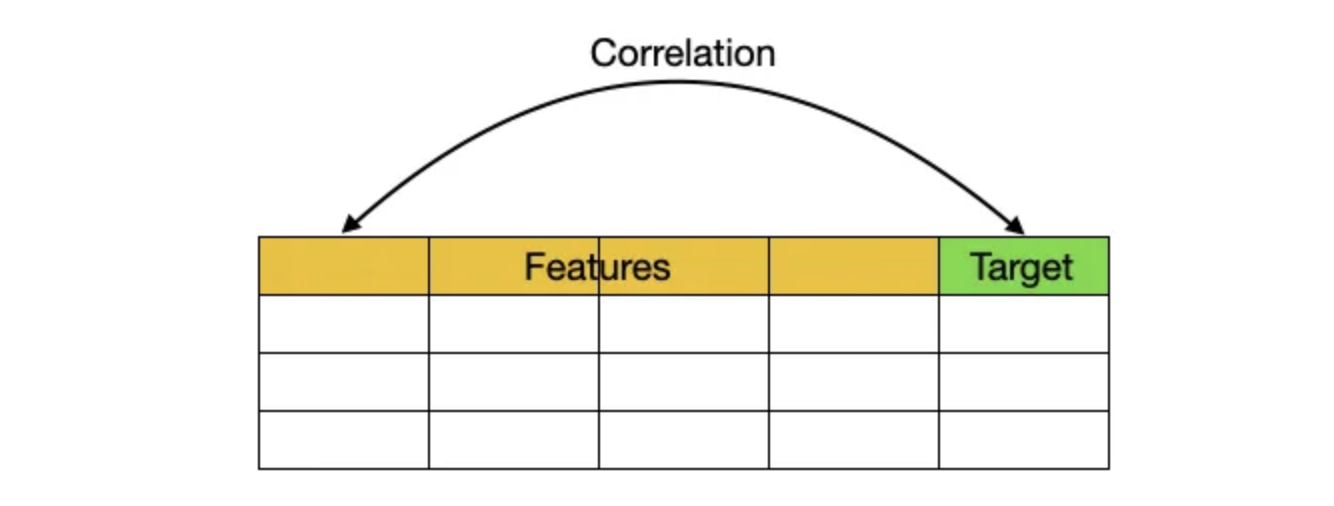

Collinearity, on the other hand, is a situation where two features are linearly associated (high correlation), and they are used as predictors for the target.

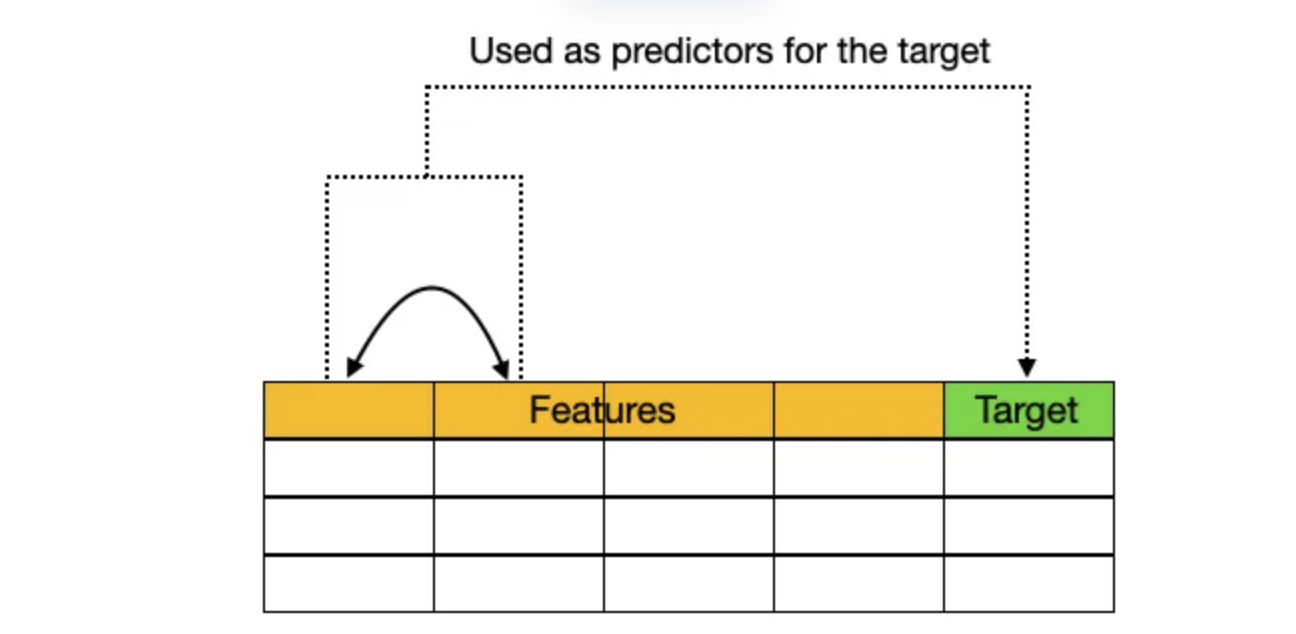

Multicollinearity is a special case of collinearity where a feature exhibits a linear relationship with two or more features.

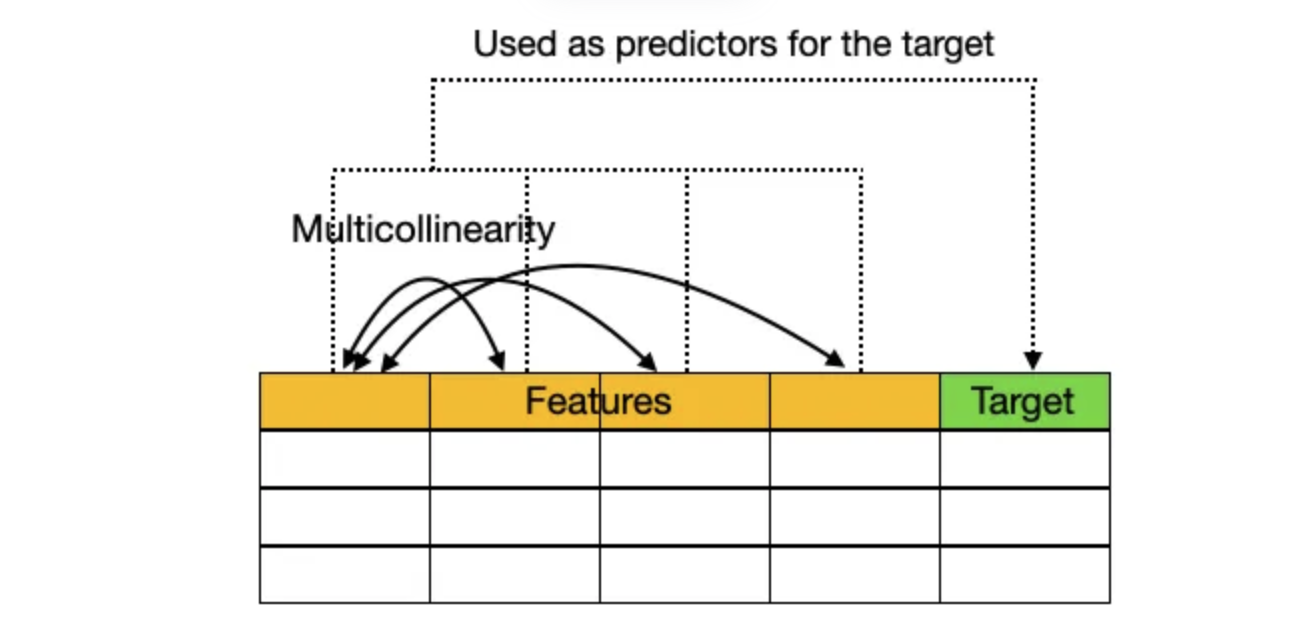

### Problem with collinearity and multicollinearity

선형회귀에서

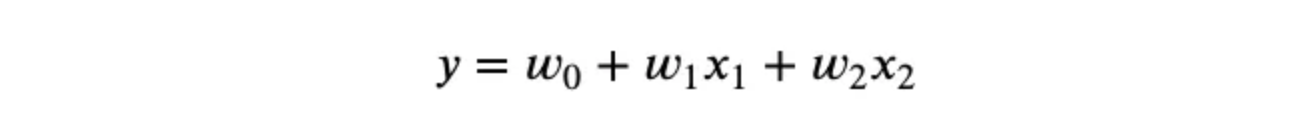

- 선형 회귀의 중요한 가정 중 하나는 각 예측 변수(x₁, x₂ 등)와 결과 Y 사이에 선형 관계가 존재해야 한다는 것입니다. 그러나 예측 변수 간에 상관 관계가 있는 경우(예: x₁와 x₂가 높은 상관 관계가 있는 경우), 두 예측 변수가 함께 변하므로 다른 변수를 일정하게 유지하면서 한 변수의 효과를 더 이상 확인할 수 없게 됩니다. 결과적으로 계수(w₁ 및 w₂)의 정확도가 떨어지고 해석 가능성이 낮아집니다.   

### Fixing Multicollinearity

데이터 전처리 단계에서 데이터 세트에서 다중 공선형성을 보이는 특징을 선별하는 것이 중요합니다. VIF(분산 인플레이션 계수)라는 방법을 사용하여 이를 수행할 수 있습니다.   

VIF를 사용하면 다양한 독립 변수 간의 상관관계의 강도를 확인할 수 있습니다. 한 변수를 가지고 다른 모든 변수에 대해 회귀하여 계산합니다.   

VIF는 다른 예측자와의 선형 종속성 때문에 계수의 분산(variance)이 얼마나 부풀려졌는지를(inflated) 계산합니다. 그래서 이름 vif입니다.

어떻게 계산하나?  
- x1, x2, x3, x4 피처가 있다고 가정함
- x1 피처를 가져와서 다른 나머지 피처로 회귀(예측)한다. x1 ~ x2 + x3 + x4  
- 실제로 위에서 다중 회귀를 수행하고 있습니다. 다중 회귀는 일반적으로 여러 독립 변수 또는 예측 변수와 하나의 종속 변수 또는 기준 변수 간의 관계를 설명합니다.

- 위의 다중 회귀로 부터 R^2 값을 계산한다.  
- R^2 값이 크면 x1 이 세 피처와 높은 상관도를 가진다는 뜻이다.


VIF는 다음과 같이 계산된다.

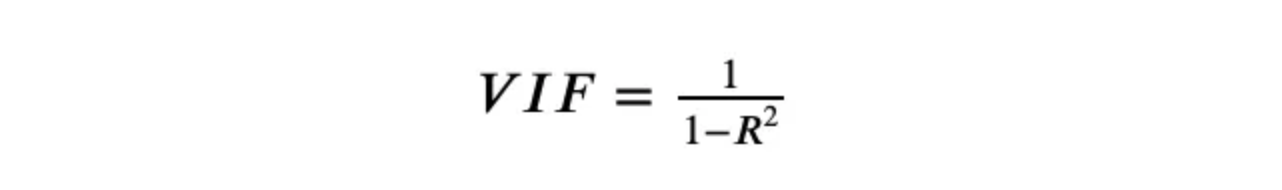

- R^2가 1에 가까우면, 즉 매우 크면 분모텀에 작아지고 VIF는 커진다.  
- VIF가 크면 해당 피처가 다른 피처와 multiconllinearity를 보인다는 뜻이다.   
- 반대의 경우는 낮은 multicollinearity를 가진다는 뜻이다.  
- (1-R^2)를 tolerance라고 한다.

### VIF 계산하기

In [2]:
from sklearn.linear_model import LinearRegression

In [3]:
def calculate_vif(df, features):
    vif, tolerance = {}, {}
    
    for feature in features:
        X = [f for f in features if f !=feature]
        X, y = df[X], df[feature]
        
        r2 = LinearRegression().fit(X, y).score(X, y)
        
        tolerance[feature] = 1 - r2
        
        vif[feature] = 1/(tolerance[feature])
    # return VIF DataFrame
    return pd.DataFrame({'VIF': vif, 'Tolerance': tolerance})

테스트 하기

In [4]:
df = pd.read_csv("data/bloodpressure.csv")
df = df.drop(['Pt','Unnamed: 8'],axis = 1)
df

,BP,Age,Weight,BSA,Dur,Pulse,Stress
0,105,47,85.4,1.75,5.1,63,33
1,115,49,94.2,2.10,3.8,70,14
2,116,49,95.3,1.98,8.2,72,10
3,117,50,94.7,2.01,5.8,73,99
4,112,51,89.4,1.89,7.0,72,95
5,121,48,99.5,2.25,9.3,71,10
6,121,49,99.8,2.25,2.5,69,42
7,110,47,90.9,1.90,6.2,66,8
8,110,49,89.2,1.83,7.1,69,62
9,114,48,92.7,2.07,5.6,64,35


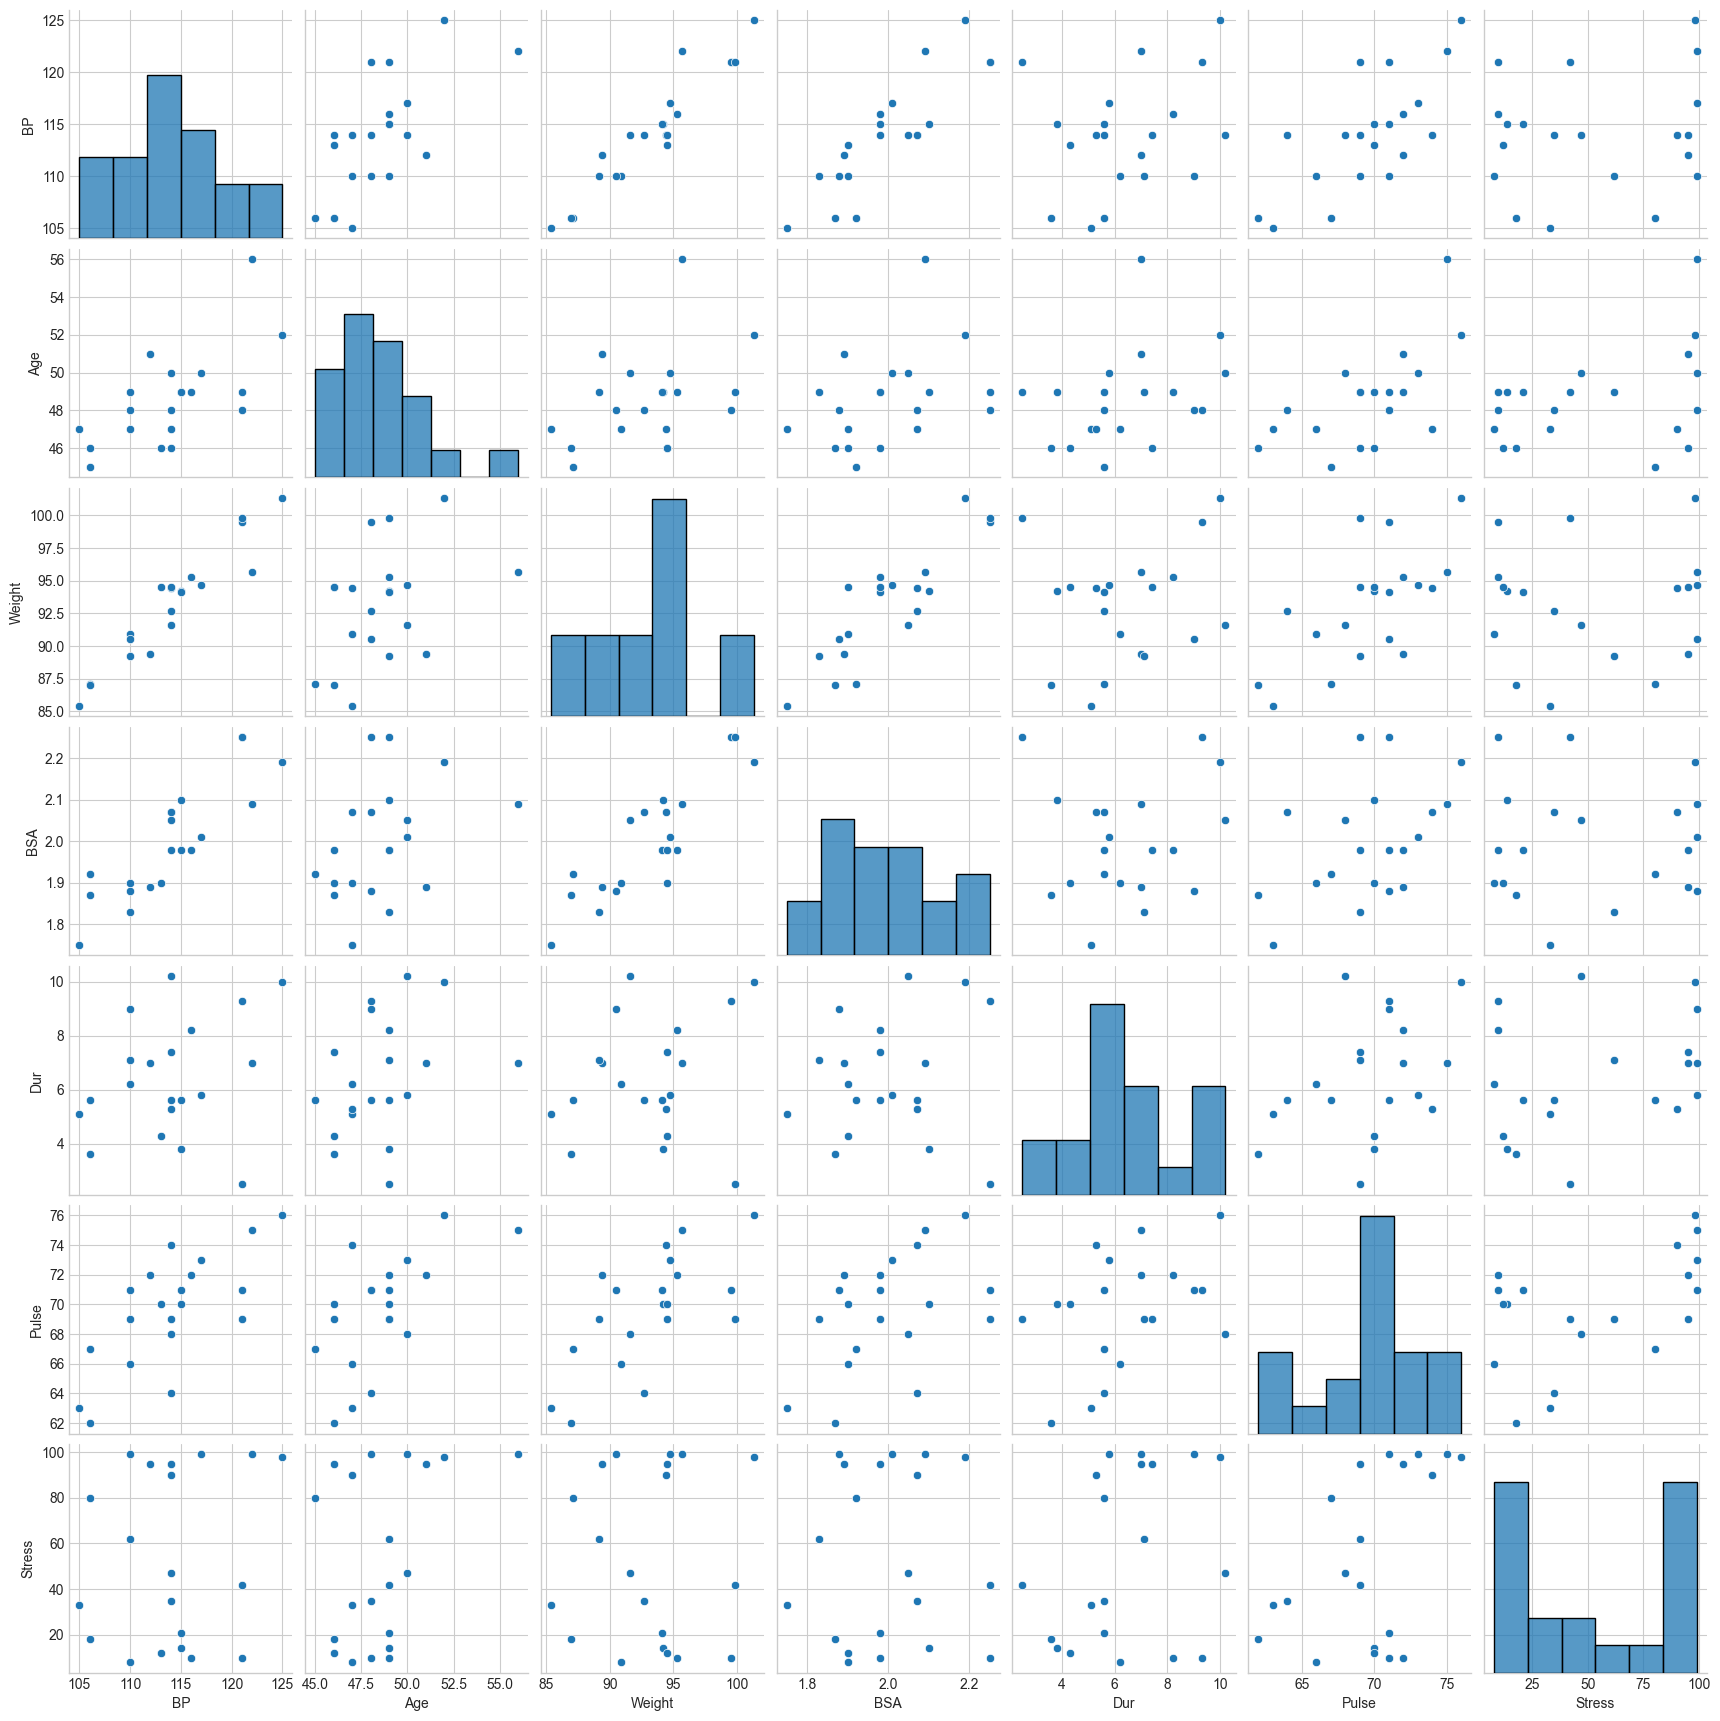

In [5]:
sns.pairplot(df)

- weight vs bp, bp vs bsa, bsa vs weight가 높은 상관성을 보임

### 상관성 계산하기

In [6]:

df.corr()

,BP,Age,Weight,BSA,Dur,Pulse,Stress
BP,1.000000,0.659093,0.950068,0.865879,0.292834,0.721413,0.163901
Age,0.659093,1.000000,0.407349,0.378455,0.343792,0.618764,0.368224
Weight,0.950068,0.407349,1.000000,0.875305,0.200650,0.659340,0.034355
BSA,0.865879,0.378455,0.875305,1.000000,0.130540,0.464819,0.018446
Dur,0.292834,0.343792,0.200650,0.130540,1.000000,0.401514,0.311640
Pulse,0.721413,0.618764,0.659340,0.464819,0.401514,1.000000,0.506310
Stress,0.163901,0.368224,0.034355,0.018446,0.311640,0.506310,1.000000


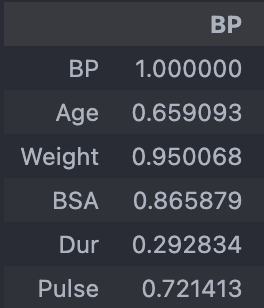

- 높은 상관성을 보이는 부분이 있다.

### Calculating VIF

In [7]:
calculate_vif(df = df, features = ['Age', 'Weight', 'BSA', 'Pulse'])

,VIF,Tolerance
Age,1.731378,0.577575
Weight,6.885801,0.145226
BSA,5.051235,0.197971
Pulse,2.817197,0.354963


### Interpreting VIF Values

- 1 : features are not correlated
- 1<VIF<5 : features are moderately correlated
- VIF>5 : features are highly correlated
- VIF>10 : high correlation between features and is cause for concern

이전 섹션에서 VIF를 계산한 결과에서 Weight와 BSA의 VIF 값이 5보다 크다는 것을 알 수 있습니다. 이는 체중과 BSA의 상관관계가 높다는 것을 의미합니다. 체중이 많이 나가는 사람은 체표면적이 더 넓기 때문에 이는 놀라운 일이 아닙니다.

따라서 다음으로 할 일은 상관관계가 높은 기능 중 하나를 제거하여 VIF 결과가 개선되는지 확인하는 것입니다. VIF가 더 높은 Weight를 제거해 보겠습니다:

In [8]:
calculate_vif(df=df, features=['Age','BSA','Pulse'])

,VIF,Tolerance
Age,1.648521,0.606604
BSA,1.297738,0.770572
Pulse,1.801669,0.555041


이제 BSA를 제거해본다.

In [9]:
calculate_vif(df=df, features=['Age','Weight','Pulse'])

,VIF,Tolerance
Age,1.620404,0.617130
Weight,1.769065,0.565270
Pulse,2.390933,0.418247


보시다시피 Weight를 제거하면 다른 모든 기능의 VIF가 BSA를 제거할 때보다 낮아집니다.   
그렇다면 Weight를 제거해야 할까요?   
이상적으로는 그렇습니다.   
하지만 현실적인 이유로 BSA를 제거하고 Weight를 유지하는 것이 더 합리적일 수 있습니다.  
나중에 모델을 학습시키고 예측에 사용할 때 환자의 체표면적보다 체중을 얻는 것이 더 쉽기 때문입니다.

### One More Example

In [10]:
from sklearn import datasets

bc = datasets.load_breast_cancer()

df = pd.DataFrame(bc.data, columns=bc.feature_names)

In [11]:
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


이중에서 8개 피처만 살펴보자.

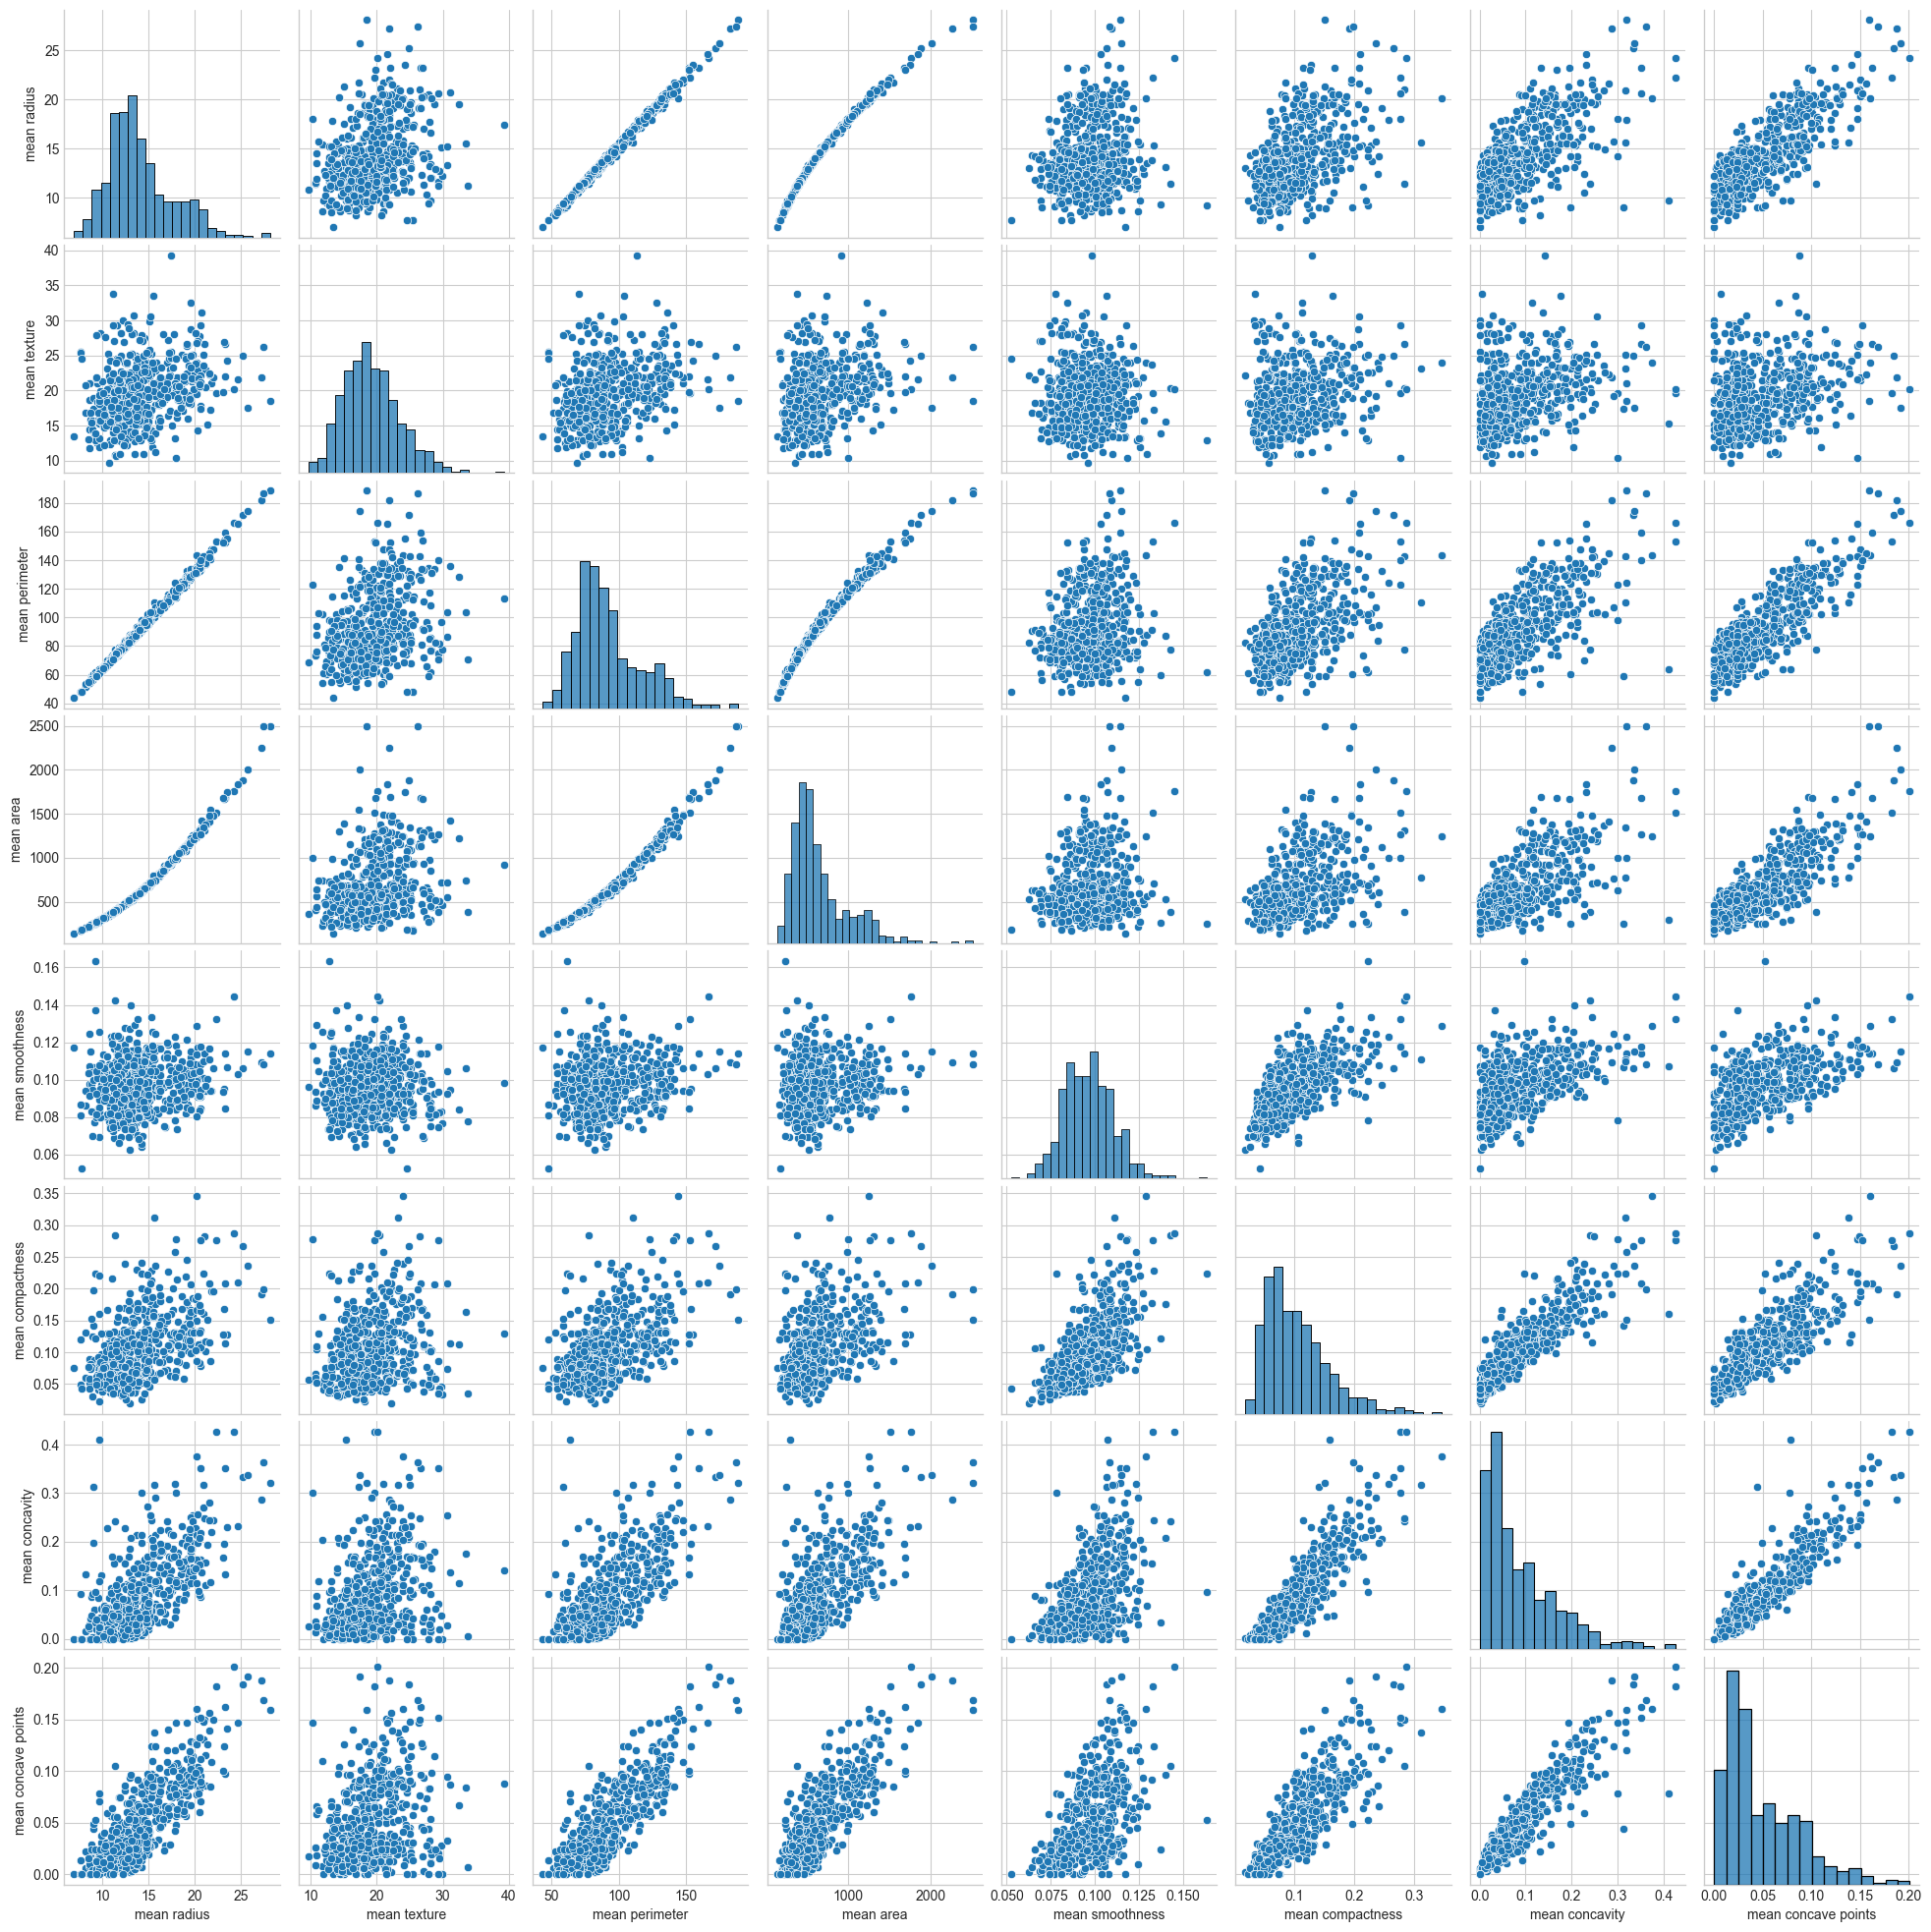

In [12]:
sns.pairplot(df.iloc[:, :8])

In [13]:
calculate_vif(df=df, features=df.columns[:8])

,VIF,Tolerance
mean radius,1585.773291,0.000631
mean texture,1.178570,0.848486
mean perimeter,1863.639493,0.000537
mean area,48.149093,0.020769
mean smoothness,2.799647,0.357188
mean compactness,14.323801,0.069814
mean concavity,11.575531,0.086389
mean concave points,21.423621,0.046677


먼저 `mean area`부터 제거해보자.

In [14]:
calculate_vif(df=df, features=['mean radius', 
                               'mean texture',
                             # 'mean area', 
                               'mean smoothness', 
                               'mean compactness', 
                               'mean concavity',
                               'mean concave points'])

,VIF,Tolerance
mean radius,6.322641,0.158162
mean texture,1.178548,0.848501
mean smoothness,2.689197,0.371858
mean compactness,6.382809,0.156671
mean concavity,10.805535,0.092545
mean concave points,21.237161,0.047087


이제 그다음 높은 mean concav points를 제거해본다.

In [15]:
calculate_vif(df=df, features=['mean radius', 
                               'mean texture',
                             # 'mean area', 
                               'mean smoothness', 
                               'mean compactness', 
                               'mean concavity',
                             # 'mean concave points'
                              ])

,VIF,Tolerance
mean radius,2.089964,0.478477
mean texture,1.178458,0.848567
mean smoothness,1.963786,0.509221
mean compactness,6.177925,0.161867
mean concavity,6.755990,0.148017


마지막으로 mean concave points를 제거해본다.

In [16]:
calculate_vif(df=df, features=['mean radius', 
                               'mean texture',
                             # 'mean area', 
                               'mean smoothness', 
                               'mean compactness', 
                             # 'mean concavity',
                             # 'mean concave points'
                              ])

,VIF,Tolerance
mean radius,1.490951,0.670713
mean texture,1.171249,0.853789
mean smoothness,1.963099,0.509399
mean compactness,2.564557,0.389931


이제 모든 VIF 값이 5보다 작이졌다.

### Summary

이 글에서는 상관관계, 상관관계, 다중 상관관계의 차이점에 대해 알아보았습니다. 특히 한 특징이 두 개 이상의 특징과 선형 관계를 나타낼 때 다중 상관관계가 발생한다는 것을 배웠습니다. 다중공선성을 감지하는 한 가지 방법은 분산 인플레이션 계수(VIF)를 계산하는 것입니다. VIF가 5를 초과하는 모든 특징은 학습 데이터 세트에서 제거해야 합니다.

VIF는 범주형 변수가 아닌 연속형 변수에서만 작동한다는 점에 유의해야 합니다.